## Linear Regression

In [22]:
import pandas as pd

year = [1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 
        2012, 2014, 2016, 2018, 2020, 2022]
model_name = ["Mac-1", "Dell-1001", "HP-1005", "Mac-2", "Lenevo-1", "Dell-1002", "HP-2005",
             "Lenevo-2", "Mac-3", "Acer-1", "Dell-1003", "Mac-4", "Acer-2", "HP-3005", 
             "Lenevo-3", "Dell-1004", "Mac-5", "Asus-3001", "Lenevo-4"]
price_of_computer = [1000, 2000, 3500, 4000, 5000, 9000, 15000, 25000, 40000, 50000, 55000, 67000, 
                     90000, 115000, 135000, 150000, 200000, 250000, 300000]

df = pd.DataFrame({"Year": year,
                   "Model Name": model_name,
                   "Price Of Computer": price_of_computer})

df.to_csv("computers_dataset.csv")#saving dataset

df.head()

,Year,Model Name,Price Of Computer
0,1986,Mac-1,1000
1,1988,Dell-1001,2000
2,1990,HP-1005,3500
3,1992,Mac-2,4000
4,1994,Lenevo-1,5000


In [23]:
print("Number of Samples: ", len(df))

Number of Samples:  19


In [24]:
import numpy as np

X = np.array(df["Year"])
X = X.reshape(-1, 1)
y = df["Price Of Computer"]

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [26]:
print("Actual Value:\n", np.array(y))

Actual Value:
 [  1000   2000   3500   4000   5000   9000  15000  25000  40000  50000
  55000  67000  90000 115000 135000 150000 200000 250000 300000]


In [27]:
predictions = lin_reg.predict(X)
print("Predicted Values:\n", predictions)

Predicted Values:
 [-51623.68421053 -37019.29824561 -22414.9122807   -7810.52631579
   6793.85964912  21398.24561404  36002.63157895  50607.01754386
  65211.40350877  79815.78947368  94420.1754386  109024.56140351
 123628.94736842 138233.33333333 152837.71929825 167442.10526316
 182046.49122807 196650.87719298 211255.26315789]


In [28]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print("R2 Score: ", r2)
print("Root Mean Squared Error: ", rmse)

R2 Score:  0.8320583343644417
Root Mean Squared Error:  35937.368250190055


Text(0.5, 1.0, 'Fit of the Line')

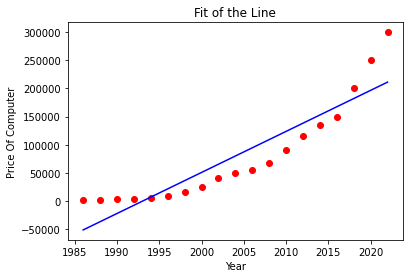

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="red")
plt.plot(X, predictions, color="blue")
plt.xlabel("Year")
plt.ylabel("Price Of Computer")
plt.title("Fit of the Line")

## Logistic Regression

In [30]:
# 0 - No, 1 - Yes
buy = [1, 1, 0, 1, 0, 1, 0, 1, 1,
      1, 0, 1, 0, 1, 0, 1, 1, 0, 0]

df["Buy"] = buy
df.head()

,Year,Model Name,Price Of Computer,Buy
0,1986,Mac-1,1000,1
1,1988,Dell-1001,2000,1
2,1990,HP-1005,3500,0
3,1992,Mac-2,4000,1
4,1994,Lenevo-1,5000,0


Text(0.5, 1.0, 'Correlation Matrix')

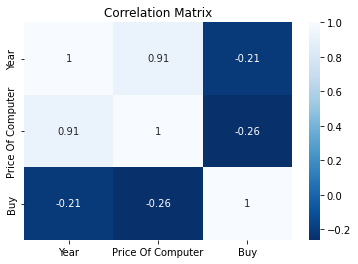

In [31]:
import seaborn as sns

corr_mat = df.corr()
sns.heatmap(data=corr_mat, annot=True, cmap = 'Blues_r')
plt.title("Correlation Matrix")

In [32]:
from sklearn.linear_model import LogisticRegression

X = df[["Year" , "Price Of Computer"]]
y = df["Buy"]

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [33]:
print("Actual Values:\n", np.array(y))

Actual Values:
 [1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0]


In [34]:
predictions = log_reg.predict(X)
print("Predicted Values:\n", predictions)

Predicted Values:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


In [35]:
score = log_reg.score(X, y)
print("Logistic Regression Score: ", score)

Logistic Regression Score:  0.631578947368421


Text(0.5, 15.0, 'Predicted label')

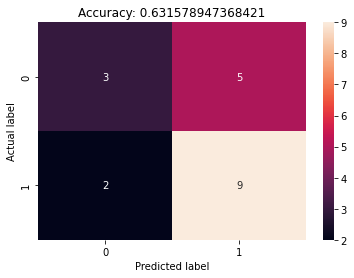

In [36]:
from sklearn.metrics import confusion_matrix

accuracy_cm = confusion_matrix(y, predictions)
sns.heatmap(data=accuracy_cm, annot=True)
plt.title("Accuracy: {0}".format(log_reg.score(X, y)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Polynomial Regression

In [46]:
X = np.array(df["Year"])
X = X.reshape(-1, 1)
y = df["Price Of Computer"]

Text(0, 0.5, 'RMS Error')

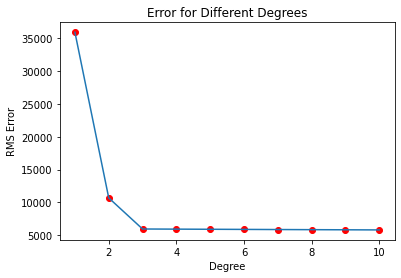

In [47]:
from sklearn.preprocessing import PolynomialFeatures

rmse = []
for n in range(1, 11):
    poly_features = PolynomialFeatures(degree = n)
    X_poly = poly_features.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    predictions = poly_reg.predict(X_poly)
    error = np.sqrt(mean_squared_error(y, predictions))
    rmse.append(error)
    
degrees = [n for n in range(1, 11)]
plt.scatter(degrees, rmse, color="red")
plt.plot(degrees, rmse)
plt.title("Error for Different Degrees")
plt.xlabel("Degree")
plt.ylabel("RMS Error")

In [52]:
#taking 3 as the best degree

poly_features = PolynomialFeatures(degree = 3)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
predictions = poly_reg.predict(X_poly)
rmse = np.sqrt(mean_squared_error(y, predictions))
r2 = r2_score(y, predictions)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Root Mean Squared Error:  5933.941852786519
R2 Score:  0.9954211914083125


Text(0.5, 1.0, 'Fit of Curve')

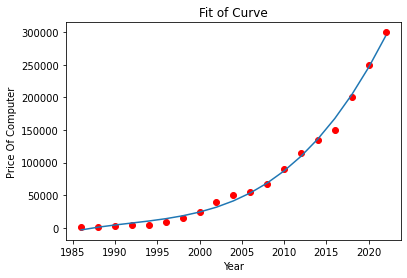

In [49]:
plt.scatter(X, y, color="red")
plt.plot(X, predictions)
plt.xlabel("Year")
plt.ylabel("Price Of Computer")
plt.title("Fit of Curve")

Text(0, 0.5, 'RMS Error')

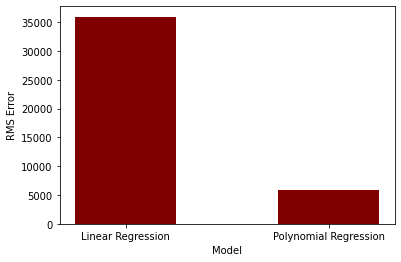

In [59]:
#comparing performance of Linear Regression and Polynomial Regression

rmse = [35937.3682, 5933.9418]
models = ["Linear Regression", "Polynomial Regression"]
plt.bar(models, rmse, color ='maroon', width = 0.5)
plt.xlabel("Model")
plt.ylabel("RMS Error")

Text(0, 0.5, 'R2 Score')

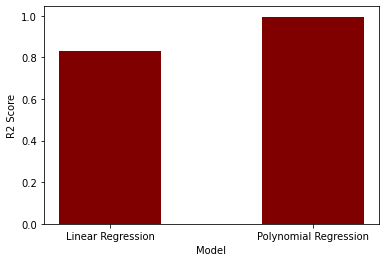

In [58]:
r2 = [0.8320, 0.9954]
models = ["Linear Regression", "Polynomial Regression"]
plt.bar(models, r2, color ='maroon', width = 0.5)
plt.xlabel("Model")
plt.ylabel("R2 Score")